<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Aplicaciones del Procesamiento de Lenguaje Natural</center></span>

<center>Práctica: Evaluación Automática de Textos- Evaluacion del Modelo</center>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Referencias</span>

1. [Aprendizaje Profundo-Diplomado](https://github.com/AprendizajeProfundo/Diplomado)
1. [Aprendizaje Profundo-PLN](https://github.com/AprendizajeProfundo/PLN)
1. Varios, [Dive into deep learning](https://d2l.ai/), enero 2021

## <span style="color:blue">Contenido</span>

- [Librerias](#Librerias)
- [Lectura de datos](#Lectura-de-datos])
- [Muestreo Estratificado](#Muestreo-estratificado])
- [Entrenamiento del tercer modelo (embeddings + features)](#Entrenamiento-del-tercer-modelo-(Embeddings-+-Features))
- [Evaluacion del entrenamiento](#Evaluacion-del-entrenamiento)
- [Evaluacion del modelo](#Evaluacion-del-modelo)

## <span style="color:blue">Librerias</span>

In [37]:
# Motor de Inteligencia Artificial
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import  Dense, Dropout, Input,Concatenate
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow_addons.metrics import RSquare
#from tensorflow_addons.optimizers import AdamW

# Manejo de datos
import pandas as pd
import numpy as np
# Chequear Versión de tensorflow
print("tensorflow version:",tf.__version__)

tensorflow version: 2.4.1


## <span style="color:blue">Lectura de datos</span>

In [ ]:
datos = pd.read_pickle('../Datos/Model_Data/Model_Data.pkl')
embedding = pd.read_csv('../Datos/Model_Data/Embedding/Doc_Embedding_300.csv')
embedding_vector_length = embedding.shape[1]

In [ ]:
embedding

In [40]:
datos

,essay_id,essay_set,corrected,score,tokens,num_corrections,token_count,unique_token_count,nostop_count,sent_count,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,1,1,"Dear local newspaper, I think effects computer...",0.8,"[Dear, local, newspaper, ,, I, think, effects,...",16,395,180,203,16,...,19,48,51,14,14,21,6,0,16,2
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.9,"[Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",25,459,206,240,21,...,19,52,72,18,19,29,8,5,10,0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.7,"[Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...",17,311,163,158,14,...,18,27,39,16,11,26,4,3,10,0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",1.0,"[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...",29,577,264,331,30,...,42,32,73,17,22,43,32,0,23,0
4,5,1,"Dear @LOCATION1, I know having computers has a...",0.8,"[Dear, @LOCATION1, ,, I, know, having, compute...",17,519,209,251,30,...,25,41,62,15,35,49,4,4,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,3.5,"[ , In, most, stories, mothers, and, daughters...",20,964,345,459,35,...,46,151,129,55,64,51,33,13,23,4
12974,21628,8,I never understood the meaning laughter is th...,3.2,"[ , I, never, understood, the, meaning, laught...",33,646,229,335,44,...,36,82,77,26,52,48,18,5,17,3
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",4.0,"[When, you, laugh, ,, is, @CAPS5, out, of, hab...",13,953,381,512,44,...,37,107,121,37,51,75,53,5,21,1
12976,21630,8,"Trippin' on fences I am @NUM1 years young, an...",4.0,"[ , Trippin, ', on, fences, I, am, @NUM1, year...",6,670,260,358,39,...,43,105,71,22,53,40,16,4,10,1


### Indices  por prompt (essay set)

In [45]:
prompt1_index = datos[datos['essay_set']==1].index
prompt2_index = datos[datos['essay_set']==2].index
prompt3_index = datos[datos['essay_set']==3].index
prompt4_index = datos[datos['essay_set']==4].index
prompt5_index = datos[datos['essay_set']==5].index
prompt6_index = datos[datos['essay_set']==6].index
prompt7_index = datos[datos['essay_set']==7].index
prompt8_index = datos[datos['essay_set']==8].index

### Rangos del Embedding 

In [3]:
embedding.min().min()

-0.1596972

In [4]:
embedding.max().max()

0.18074721

In [10]:
features = datos.select_dtypes(include='number').iloc[:,2:]
features

,score,num_corrections,token_count,unique_token_count,nostop_count,sent_count,ner_count,comma,question,exclamation,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,0.8,16,395,180,203,16,2,18,3,4,...,19,48,51,14,14,21,6,0,16,2
1,0.9,25,459,206,240,21,9,16,3,1,...,19,52,72,18,19,29,8,5,10,0
2,0.7,17,311,163,158,14,2,13,0,0,...,18,27,39,16,11,26,4,3,10,0
3,1.0,29,577,264,331,30,6,14,1,2,...,42,32,73,17,22,43,32,0,23,0
4,0.8,17,519,209,251,30,6,15,0,0,...,25,41,62,15,35,49,4,4,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,3.5,20,964,345,459,35,20,60,0,0,...,46,151,129,55,64,51,33,13,23,4
12974,3.2,33,646,229,335,44,15,24,10,0,...,36,82,77,26,52,48,18,5,17,3
12975,4.0,13,953,381,512,44,16,48,7,9,...,37,107,121,37,51,75,53,5,21,1
12976,4.0,6,670,260,358,39,11,41,2,0,...,43,105,71,22,53,40,16,4,10,1


In [12]:
features.columns

Index(['score', 'num_corrections', 'token_count', 'unique_token_count',
       'nostop_count', 'sent_count', 'ner_count', 'comma', 'question',
       'exclamation', 'quotation', 'organization', 'caps', 'person',
       'location', 'money', 'time', 'date', 'percent', 'noun', 'adj', 'pron',
       'verb', 'cconj', 'adv', 'det', 'propn', 'num', 'part', 'intj'],
      dtype='object')

In [13]:
#target = features_st_norm['standard_score']
target = features['score']
target

0        0.8
1        0.9
2        0.7
3        1.0
4        0.8
        ... 
12973    3.5
12974    3.2
12975    4.0
12976    4.0
12977    4.0
Name: score, Length: 12978, dtype: float64

In [47]:
features = features.iloc[:,1:]
features

,token_count,unique_token_count,nostop_count,sent_count,ner_count,comma,question,exclamation,quotation,organization,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,395,180,203,16,2,18,3,4,7,2,...,19,48,51,14,14,21,6,0,16,2
1,459,206,240,21,9,16,3,1,5,0,...,19,52,72,18,19,29,8,5,10,0
2,311,163,158,14,2,13,0,0,5,1,...,18,27,39,16,11,26,4,3,10,0
3,577,264,331,30,6,14,1,2,6,4,...,42,32,73,17,22,43,32,0,23,0
4,519,209,251,30,6,15,0,0,6,0,...,25,41,62,15,35,49,4,4,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,964,345,459,35,20,60,0,0,29,0,...,46,151,129,55,64,51,33,13,23,4
12974,646,229,335,44,15,24,10,0,23,0,...,36,82,77,26,52,48,18,5,17,3
12975,953,381,512,44,16,48,7,9,22,0,...,37,107,121,37,51,75,53,5,21,1
12976,670,260,358,39,11,41,2,0,23,10,...,43,105,71,22,53,40,16,4,10,1


## <span style="color:blue">Muestreo estratificado</span>

In [15]:
datos.columns

Index(['essay_id', 'essay_set', 'corrected', 'score', 'tokens',
       'num_corrections', 'token_count', 'unique_token_count', 'nostop_count',
       'sent_count', 'ner_count', 'comma', 'question', 'exclamation',
       'quotation', 'organization', 'caps', 'person', 'location', 'money',
       'time', 'date', 'percent', 'noun', 'adj', 'pron', 'verb', 'cconj',
       'adv', 'det', 'propn', 'num', 'part', 'intj'],
      dtype='object')

In [48]:
conteo = datos.groupby('essay_set')[['essay_set']].count()
conteo

,essay_set
essay_set,
1,1783
2,1800
3,1726
4,1772
5,1805
6,1800
7,1569
8,723


In [49]:
# Muestras para validación

# semilla para reproductibilidad
np.random.seed(seed=1000)
# muestra
muestra = np.round(conteo*0.1,decimals=0).astype(int)
muestra

,essay_set
essay_set,
1,178
2,180
3,173
4,177
5,180
6,180
7,157
8,72


In [50]:
# Función de Muestreo Estratificado
def strat(df,label,groups):
    
    strat = pd.DataFrame([])
    
    for i,cat in enumerate(sorted(df[f'{label}'].unique())):
        df_cal = df[df[f'{label}']==cat]
        muestra = df_cal.sample(groups[i],random_state=22)
        strat = pd.concat([strat,muestra])
    return strat

### Datos Test 

In [51]:
data_test = strat(datos,'essay_set',muestra['essay_set'].values)
data_test

,essay_id,essay_set,corrected,score,tokens,num_corrections,token_count,unique_token_count,nostop_count,sent_count,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
829,832,1,"Dear editor, computers are good for people bec...",0.2,"[Dear, editor, ,, computers, are, good, for, p...",1,21,20,11,1,...,3,2,2,2,1,0,0,0,0,0
1366,1371,1,"Dear Local Newspaper, I feel that negative eff...",1.2,"[Dear, Local, Newspaper, ,, I, feel, that, neg...",29,609,257,324,34,...,42,60,61,25,35,38,16,0,11,2
329,331,1,"Dear @CAPS1, A recent study by scientists show...",1.0,"[Dear, @CAPS1, ,, A, recent, study, by, scient...",10,549,249,272,34,...,30,70,72,21,28,35,2,2,19,0
1278,1283,1,"Dear @CAPS1, In a recent poll it was determine...",1.0,"[Dear, @CAPS1, ,, In, a, recent, poll, it, was...",5,401,200,227,25,...,22,36,52,16,20,27,6,0,8,0
1102,1105,1,"Dear editor, @TIME1 week, I noticed an article...",0.9,"[Dear, editor, ,, @TIME1, week, ,, I, noticed,...",11,443,189,248,26,...,27,56,54,17,23,21,9,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12744,21327,8,I was in @NUM1 grade; when it was almost the ...,3.3,"[ , I, was, in, @NUM1, grade, ;, when, it, was...",22,540,210,220,16,...,28,111,65,27,29,28,3,4,9,5
12825,21433,8,A @CAPS1 @CAPS2 The @CAPS3 @CAPS4 was a warm ...,3.5,"[ , A, @CAPS1, @CAPS2, The, @CAPS3, @CAPS4, wa...",23,874,327,459,52,...,47,103,118,25,60,78,51,5,23,1
12271,20736,8,"""Laughter"" A good relationship is built on tr...",4.5,"[ , "", Laughter, "", A, good, relationship, is,...",11,817,322,425,42,...,63,125,101,28,47,41,19,8,24,1
12738,21319,8,The snow shimmered in the sunlight like sequi...,4.6,"[ , The, snow, shimmered, in, the, sunlight, l...",6,845,376,498,61,...,53,121,111,21,29,77,11,2,16,0


### Datos entrenamiento

In [52]:
# Sacar Validation y training
data_train = datos.loc[np.setdiff1d(datos.index,data_test.index)]
data_train

,essay_id,essay_set,corrected,score,tokens,num_corrections,token_count,unique_token_count,nostop_count,sent_count,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,1,1,"Dear local newspaper, I think effects computer...",0.8,"[Dear, local, newspaper, ,, I, think, effects,...",16,395,180,203,16,...,19,48,51,14,14,21,6,0,16,2
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.9,"[Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...",25,459,206,240,21,...,19,52,72,18,19,29,8,5,10,0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.7,"[Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...",17,311,163,158,14,...,18,27,39,16,11,26,4,3,10,0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",1.0,"[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...",29,577,264,331,30,...,42,32,73,17,22,43,32,0,23,0
4,5,1,"Dear @LOCATION1, I know having computers has a...",0.8,"[Dear, @LOCATION1, ,, I, know, having, compute...",17,519,209,251,30,...,25,41,62,15,35,49,4,4,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,3.5,"[ , In, most, stories, mothers, and, daughters...",20,964,345,459,35,...,46,151,129,55,64,51,33,13,23,4
12974,21628,8,I never understood the meaning laughter is th...,3.2,"[ , I, never, understood, the, meaning, laught...",33,646,229,335,44,...,36,82,77,26,52,48,18,5,17,3
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",4.0,"[When, you, laugh, ,, is, @CAPS5, out, of, hab...",13,953,381,512,44,...,37,107,121,37,51,75,53,5,21,1
12976,21630,8,"Trippin' on fences I am @NUM1 years young, an...",4.0,"[ , Trippin, ', on, fences, I, am, @NUM1, year...",6,670,260,358,39,...,43,105,71,22,53,40,16,4,10,1


In [53]:
embedding_train = embedding.iloc[data_train.index]
embedding_test = embedding.iloc[data_test.index]
print(embedding_train.shape)
print(embedding_test.shape)
print(embedding_train.shape[0] + embedding_test.shape[0])

(11681, 300)
(1297, 300)
12978


In [54]:
features_train = features.iloc[data_train.index]
features_test = features.iloc[data_test.index]
print(features_train.shape)
print(features_test.shape)

(11681, 28)
(1297, 28)


In [55]:
target_train = target.iloc[data_train.index]
target_test = target.iloc[data_test.index]

## Cambio de Escalas features

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1.0,1.0))

features_train_scaled = pd.DataFrame(scaler.fit_transform(features_train))
features_test_scaled = pd.DataFrame(scaler.fit_transform(features_test))
#target_train_scaled = scaler.fit_transform(target_train.values.reshape(-1,1))
#target_test_scaled = scaler.fit_transform(target_test.values.reshape(-1,1))
features_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.369687,-0.289421,-0.453804,-0.711538,-0.918367,-0.520000,-0.956522,-0.703704,-0.866667,-0.90,...,-0.547619,-0.567568,-0.423729,-0.600000,-0.702128,-0.603774,-0.889908,-1.000000,-0.448276,-0.897436
1,-0.267041,-0.185629,-0.353261,-0.615385,-0.632653,-0.573333,-0.956522,-0.925926,-0.904762,-1.00,...,-0.547619,-0.531532,-0.186441,-0.485714,-0.595745,-0.452830,-0.853211,-0.545455,-0.655172,-1.000000
2,-0.504411,-0.357285,-0.576087,-0.750000,-0.918367,-0.653333,-1.000000,-1.000000,-0.904762,-0.95,...,-0.571429,-0.756757,-0.559322,-0.542857,-0.765957,-0.509434,-0.926606,-0.727273,-0.655172,-1.000000
3,-0.077787,0.045908,-0.105978,-0.442308,-0.755102,-0.626667,-0.985507,-0.851852,-0.885714,-0.80,...,0.000000,-0.711712,-0.175141,-0.514286,-0.531915,-0.188679,-0.412844,-1.000000,-0.206897,-1.000000
4,-0.170810,-0.173653,-0.323370,-0.442308,-0.755102,-0.600000,-1.000000,-1.000000,-0.885714,-1.00,...,-0.404762,-0.630631,-0.299435,-0.571429,-0.255319,-0.075472,-0.926606,-0.636364,-0.310345,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,0.542903,0.369261,0.241848,-0.346154,-0.183673,0.600000,-1.000000,-1.000000,-0.447619,-1.00,...,0.095238,0.360360,0.457627,0.571429,0.361702,-0.037736,-0.394495,0.181818,-0.206897,-0.794872
11677,0.032879,-0.093812,-0.095109,-0.173077,-0.387755,-0.360000,-0.855072,-1.000000,-0.561905,-1.00,...,-0.142857,-0.261261,-0.129944,-0.257143,0.106383,-0.094340,-0.669725,-0.545455,-0.413793,-0.846154
11678,0.525261,0.512974,0.385870,-0.173077,-0.346939,0.280000,-0.898551,-0.333333,-0.580952,-1.00,...,-0.119048,-0.036036,0.367232,0.057143,0.085106,0.415094,-0.027523,-0.545455,-0.275862,-0.948718
11679,0.071371,0.029940,-0.032609,-0.269231,-0.551020,0.093333,-0.971014,-1.000000,-0.561905,-0.50,...,0.023810,-0.054054,-0.197740,-0.371429,0.127660,-0.245283,-0.706422,-0.636364,-0.655172,-0.948718


## <span style="color:blue">Entrenamiento del tercer modelo (embeddings + features)</span>

In [57]:
# Build the model

embedding_vector_length = 300

x1 = Input(shape =(embedding_vector_length),name='Input_Embedding')
x2 = Input(shape =(features.shape[1],),name='Input_Features')

x = Concatenate(name='Concatenar')([x1,x2])
x = Dropout(0.2)(x)
x = Dense(128,activation='relu',name='Capa_Densa_1')(x)
x = Dropout(0.2)(x)
x = Dense(64,activation='relu',name='Capa_Densa_2')(x)
x = Dropout(0.2)(x)
x = Dense(32,activation='relu',name='Capa_Densa_3')(x)
x = Dropout(0.2)(x)
x = Dense(1,activation='relu',name='Output')(x)

model =  Model(inputs=[x1,x2],outputs=x)

model.compile(loss='mse',optimizer='adam', metrics=['mae',RSquare()])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Embedding (InputLayer)    [(None, 300)]        0                                            
__________________________________________________________________________________________________
Input_Features (InputLayer)     [(None, 28)]         0                                            
__________________________________________________________________________________________________
Concatenar (Concatenate)        (None, 328)          0           Input_Embedding[0][0]            
                                                                 Input_Features[0][0]             
__________________________________________________________________________________________________
dropout (Dropout)               (None, 328)          0           Concatenar[0][0]             

2022-06-07 09:19:02.976812: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-07 09:19:02.976929: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-07 09:19:02.979953: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


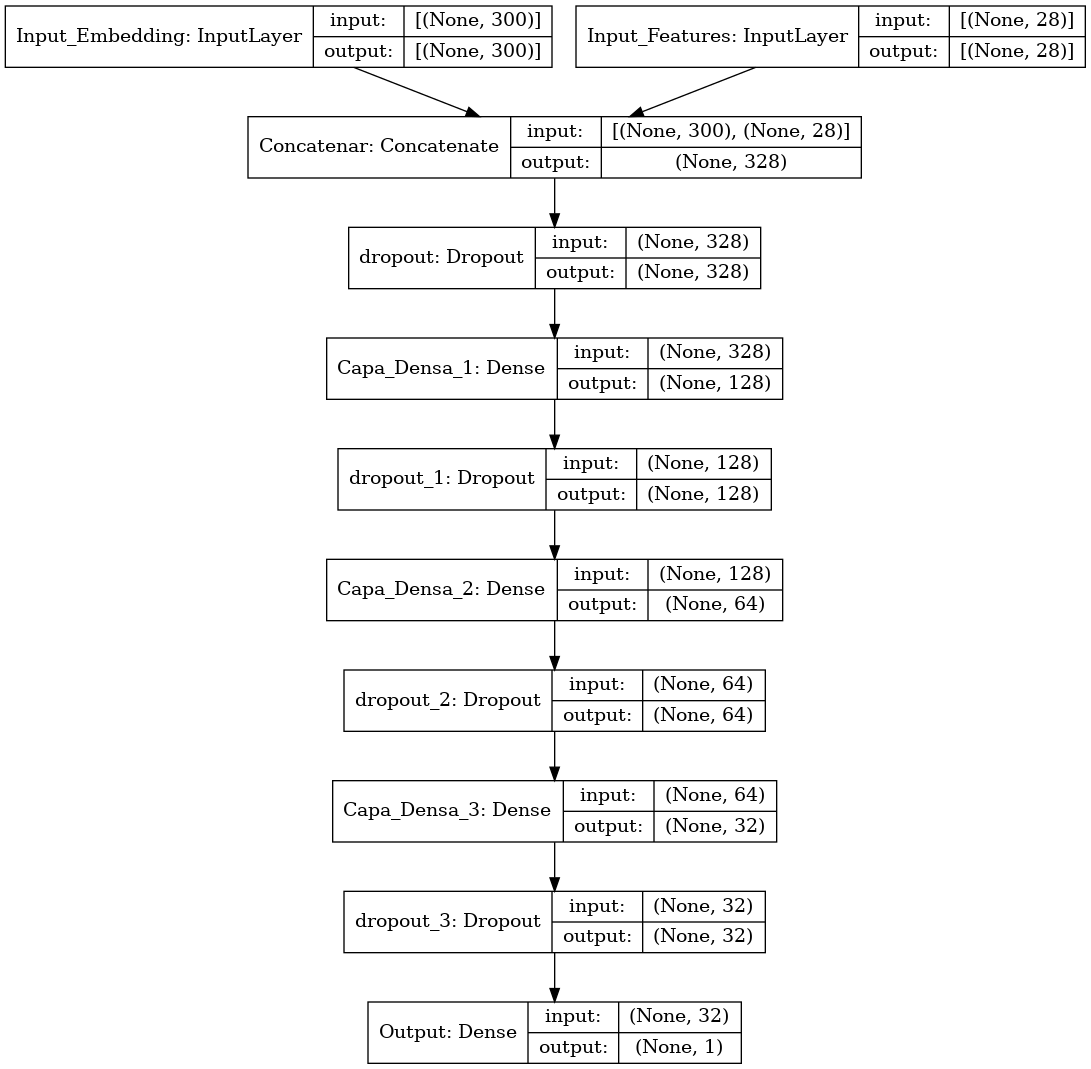

In [58]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='../Imagenes/model_3.png')

In [59]:
class SaveBestModel(tf.keras.callbacks.Callback):
    def __init__(self, save_best_metric='val_loss', this_max=False):
        self.save_best_metric = save_best_metric
        self.max = this_max
        if this_max:
            self.best = float('-inf')
        else:
            self.best = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        metric_value = logs[self.save_best_metric]
        if self.max:
            if metric_value > self.best:
                self.best = metric_value
                self.best_weights = self.model.get_weights()

        else:
            if metric_value < self.best:
                self.best = metric_value
                self.best_weights= self.model.get_weights()
                
save_best_model = SaveBestModel()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-8)

In [60]:
history = model.fit(x = [embedding_train,features_train_scaled],
                    y = target_train,
                    validation_data = ([embedding_test,features_test_scaled],target_test),
                    epochs=100,
                    batch_size=32,verbose=1, callbacks=[save_best_model])

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-06-07 09:19:20.639721: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-07 09:19:20.660014: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3699980000 Hz


366/366 [==============================] - 2s 5ms/step - loss: 0.5839 - mae: 0.4684 - r_square: 0.3017 - val_loss: 0.1454 - val_mae: 0.2182 - val_r_square: 0.8104
Epoch 2/100
366/366 [==============================] - 1s 3ms/step - loss: 0.2203 - mae: 0.2777 - r_square: 0.7337 - val_loss: 0.1057 - val_mae: 0.1826 - val_r_square: 0.8621
Epoch 3/100
366/366 [==============================] - 1s 3ms/step - loss: 0.1729 - mae: 0.2367 - r_square: 0.7825 - val_loss: 0.0897 - val_mae: 0.1784 - val_r_square: 0.8830
Epoch 4/100
366/366 [==============================] - 1s 4ms/step - loss: 0.1371 - mae: 0.2154 - r_square: 0.8285 - val_loss: 0.0667 - val_mae: 0.1507 - val_r_square: 0.9130
Epoch 5/100
366/366 [==============================] - 1s 3ms/step - loss: 0.1257 - mae: 0.2007 - r_square: 0.8434 - val_loss: 0.0706 - val_mae: 0.1570 - val_r_square: 0.9080
Epoch 6/100
366/366 [==============================] - 1s 3ms/step - loss: 0.1138 - mae: 0.1950 - r_square: 0.8534 - val_loss: 0.0593 - v

## <span style="color:blue">Evaluacion del entrenamiento</span>

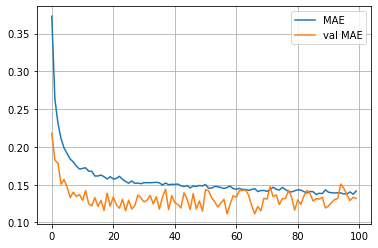

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.legend()
plt.grid()
plt.savefig('../Imagenes/Val_MAE.png')
plt.show()

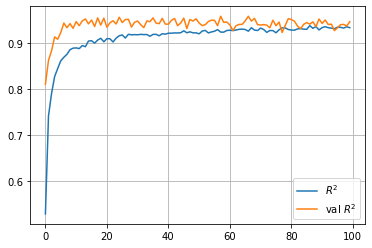

In [62]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['r_square'], label='$R^2$')
plt.plot(history.history['val_r_square'], label='val $R^2$')
plt.legend()
plt.grid()
plt.savefig('../Imagenes/Val_R_square.png')
plt.show()

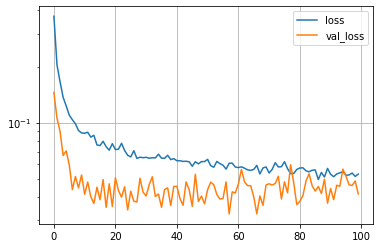

In [63]:
plt.semilogy(history.history['loss'], label='loss')
plt.semilogy(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.savefig('../Imagenes/Val_Loss.png')
plt.show()

### Best Checkpoint 

In [64]:
model.set_weights(save_best_model.best_weights)

In [66]:
save_best_model.best

0.03241860121488571

Epoch 55/100
366/366 [==============================] - 2s 5ms/step - loss: 0.0671 - mae: 0.1446 - r_square: 0.9159 - val_loss: 0.0307 - val_mae: 0.1037 - val_r_square: 0.9608

## <span style="color:blue">Evaluacion del modelo</span>

### Librerias

In [69]:
import scipy
from scipy.stats import kendalltau

import sklearn
from sklearn.metrics import r2_score

### Correlaciones y scatter plot con datos de entrenamiento

In [87]:
y_pred_train = model.predict([embedding_train,features_train_scaled])
y_pred_train = np.squeeze(y_pred_train )
y_true_train = target_train


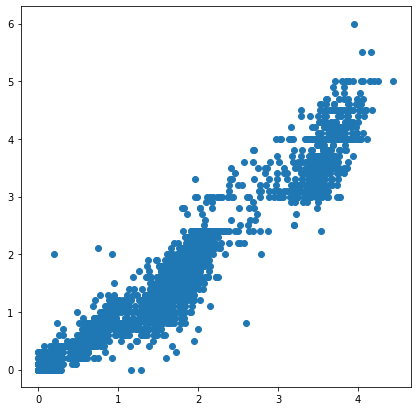

In [91]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred_train,y_true_train)
plt.savefig('../Imagenes/Model_Train.png')
plt.show()

### Correlaciones y scatter plot con datos de entrenamiento

In [99]:
# Pearson r trainin
r, _ = scipy.stats.pearsonr(y_true_train,y_pred_train)
#kendall-tau
tau, _ =  kendalltau(y_true_train,y_pred_train)
# spearman(rank) rho
rho, _ = scipy.stats.spearmanr(y_true_train,y_pred_train)
r_square = r2_score(y_true_train,y_pred_train)

print('pearson =', np.round(r,2))
print('kendall =', np.round(tau,2))
print('spearman =', np.round(rho,2))
print('rsquare =', np.round(r_square,2))

pearson = 0.98
kendall = 0.85
spearman = 0.95
rsquare = 0.96


### Correlaciones y scatter plot con datos de prueba (test)

In [101]:
y_pred_test = model.predict([embedding_test,features_test_scaled])
y_pred_test = np.squeeze(y_pred_test)
y_true_test = target_test
y_pred_test.shape

(1297,)

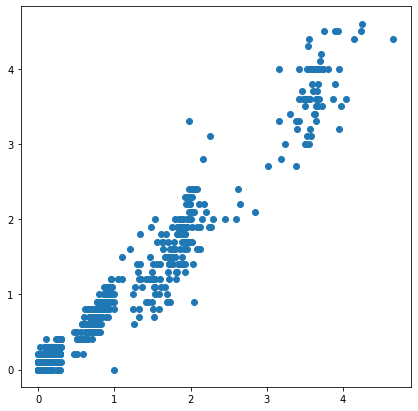

In [102]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred_test, y_true_test)
plt.savefig('../Imagenes/Model_Test.png')
plt.show()

In [105]:
# Pearson r test
r, _ = scipy.stats.pearsonr(y_true_test,y_pred_test)
#kendall-tau
tau, _ =  kendalltau(y_true_test,y_pred_test)
# spearman(rank) rho
rho, _ = scipy.stats.spearmanr(y_true_test,y_pred_test)
r_square = r2_score(y_true_test,y_pred_test)

print('pearson =', np.round(r,2))
print('kendall =', np.round(tau,2))
print('spearman =', np.round(rho,2))
print('rsquare =', np.round(r_square,2))

pearson = 0.98
kendall = 0.84
spearman = 0.94
rsquare = 0.96


(array([0.50834477, 0.9536648 , 0.9292884 , ..., 3.7532206 , 4.2541676 ,
        3.6036174 ], dtype=float32),
 (829      0.2
  1366     1.2
  329      1.0
  1278     1.0
  1102     0.9
          ... 
  12744    3.3
  12825    3.5
  12271    4.5
  12738    4.6
  12602    4.0
  Name: score, Length: 1297, dtype: float64,
  array([0.50834477, 0.9536648 , 0.9292884 , ..., 3.7532206 , 4.2541676 ,
         3.6036174 ], dtype=float32)))

$R^2 = 0.954$ en validacion

|statistics|trainig|validation|test|
|---|---|---|---|
|$R^2$|0.96|0.96|0.96|
|Person-r|0.98|0.98|0.98|
|Kendall-$\tau$|0.85 |0.85|0.84|
|Spearman-$\rho$|0.95 |095|0.94|

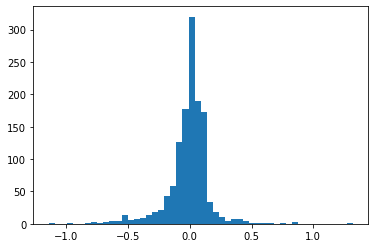

In [79]:
plt.hist(y_true-y_pred.reshape(-1), bins=50)
plt.savefig('../Imagenes/error_dist.png')
plt.show()

In [76]:
np.mean(y_true-y_pred.reshape(-1))

-0.00889266616303641

In [77]:
np.var(y_true-y_pred.reshape(-1))

0.032339520770820966

In [78]:
0.02907425197628409**2

0.0008453121279804593

## <span style="color:blue">Prediccion de categorias</span>

### Librerias

In [323]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import cohen_kappa_score

### Funcion para categorizar las predicciones

In [290]:
def categorize(pred, y_true):
    cat_y = np.unique(y_true)
    cat_pred = []
    for i in range(len(list(pred))):
        cat = cat_y[np.argmin(np.abs(cat_y - pred[i]))] 
        cat_pred.append(cat)
    return np.array(cat_pred)

### Escala todos los features

In [116]:
scaler = MinMaxScaler((-1.0,1.0))
features_scaled = pd.DataFrame(scaler.fit_transform(features))

### Prompt 1

In [328]:
# extrae los datos
embedding_1 = embedding.iloc[prompt1_index]
feature_1 = features_scaled.iloc[prompt1_index]

# hace la prediccion
y_pred_1 = model.predict([embedding_1,feature_1])
y_pred_1 = np.squeeze(y_pred_1)
y_true_1 = target.iloc[prompt1_index]

# re-escala los valores
y_pred_1 *= 10.
y_true_1 *= 10.

# categoriza las predicciones
y_pred_1_cat = categorize(y_pred_1, y_true_1 )

# convierte todo np.int32
y_pred_1_cat = np.array(list(y_pred_1_cat.astype(np.int32)))
y_true_1_cat = np.array(list(y_true_1.astype(np.int32)))

# calcula QWK
qwk_1 = cohen_kappa_score(y_pred_1_cat, y_true_1_cat, weights='quadratic') # 0.66

# construye matriz de confusion

cm_1 = confusion_matrix(y_true_1_cat, y_pred_1_cat)
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1)

#disp_1.plot()
#plt.show()

print(classification_report(y_true_1_cat, y_pred_1_cat))

              precision    recall  f1-score   support

           2       1.00      0.10      0.18        10
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.15      0.12      0.13        17
           6       0.42      0.21      0.28       110
           7       0.27      0.52      0.36       135
           8       0.63      0.56      0.60       687
           9       0.28      0.65      0.40       334
          10       0.27      0.07      0.11       316
          11       0.00      0.00      0.00       109
          12       0.00      0.00      0.00        47

    accuracy                           0.40      1783
   macro avg       0.28      0.20      0.19      1783
weighted avg       0.40      0.40      0.37      1783



/home/bizon/anaconda3/envs/sentence_transformers/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bizon/anaconda3/envs/sentence_transformers/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bizon/anaconda3/envs/sentence_transformers/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [292]:
qwk_1

0.659014492423011

### Prompt 2

In [329]:
# extrae los datos
embedding_2 = embedding.iloc[prompt2_index]
feature_2 = features_scaled.iloc[prompt2_index]

# hace la prediccion
y_pred_2 = model.predict([embedding_2,feature_2])
y_pred_2 = np.squeeze(y_pred_2 )
y_true_2 = target.iloc[prompt2_index]

# re-escala los valores
y_pred_2 *= 10.
y_true_2 *= 10.

# categoriza las predicciones
y_pred_2_cat = categorize(y_pred_2, y_true_2 )

# convierte todo np.int32
y_pred_2_cat = np.array(list(y_pred_2_cat.astype(np.int32)))
y_true_2_cat = np.array(list(y_true_2.astype(np.int32)))

# calcula QWK
qwk_2 = cohen_kappa_score(y_pred_2_cat, y_true_2_cat, weights='quadratic') # 0.54

# construye matriz de confusion
cm_2 = confusion_matrix(y_true_2_cat, y_pred_2_cat, labels=list(range(2,12)))
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2)

#disp_2.plot()
#plt.show()
print(classification_report(y_true_2_cat, y_pred_2_cat))

              precision    recall  f1-score   support

           2       0.29      0.12      0.17        17
           3       0.20      0.06      0.09        17
           4       0.44      0.07      0.12       101
           5       0.20      0.12      0.15       122
           6       0.49      0.33      0.40       514
           7       0.23      0.65      0.34       355
           8       0.55      0.28      0.37       592
           9       0.47      0.25      0.33        75
          10       0.07      0.14      0.10         7

    accuracy                           0.34      1800
   macro avg       0.33      0.23      0.23      1800
weighted avg       0.43      0.34      0.34      1800



In [294]:
qwk_2 

0.5401774450990824

### Prompt 3

In [318]:
# extrae los datos
embedding_3 = embedding.iloc[prompt3_index]
feature_3 = features_scaled.iloc[prompt3_index]

# hace la prediccion
y_pred_3 = model.predict([embedding_3,feature_3])
y_pred_3 = np.squeeze(y_pred_3 )
y_true_3 = target.iloc[prompt3_index]

# re-escala los valores
y_pred_3 *= 10.
y_true_3 *= 10.

# categoriza las predicciones
y_pred_3_cat = categorize(y_pred_3, y_true_3 )

# convierte todo np.int32
y_pred_3_cat = np.array(list(y_pred_3_cat.astype(np.int32)))
y_true_3_cat = np.array(list(y_true_3.astype(np.int32)))

# calcula QWK
qwk_3 = cohen_kappa_score(y_pred_3_cat, y_true_3_cat, weights='quadratic') # 0.58

# construye matriz de confusion
cm_3 = confusion_matrix(y_true_3_cat, y_pred_3_cat)
disp_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3)

#disp_3.plot()
#plt.show()

In [319]:
qwk_3

0.5759557950938521

### Prompt 4

In [298]:
# extrae los datos
embedding_4 = embedding.iloc[prompt4_index]
feature_4 = features_scaled.iloc[prompt4_index]

# hace la prediccion
y_pred_4 = model.predict([embedding_4,feature_4])
y_pred_4 = np.squeeze(y_pred_4 )
y_true_4 = target.iloc[prompt4_index]

# re-escala los valores
y_pred_4 *= 10.
y_true_4 *= 10.

# categoriza las predicciones
y_pred_4_cat = categorize(y_pred_4, y_true_4 )

# convierte todo np.int32
y_pred_4_cat = np.array(list(y_pred_4_cat.astype(np.int32)))
y_true_4_cat = np.array(list(y_true_4.astype(np.int32)))

# calcula QWK
qwk_4 = cohen_kappa_score(y_pred_4_cat, y_true_4_cat, weights='quadratic') # 0.52

# construye matriz de confusion
cm_4 = confusion_matrix(y_true_4_cat, y_pred_4_cat)
disp_4 = ConfusionMatrixDisplay(confusion_matrix=cm_4)

#disp_4.plot()
#plt4.show()

In [299]:
qwk_4 

0.5205873456030298

### Prompt 5

In [300]:
## extrae los datos
embedding_5 = embedding.iloc[prompt5_index]
feature_5 = features_scaled.iloc[prompt5_index]

# hace la prediccion
y_pred_5 = model.predict([embedding_5,feature_5])
y_pred_5 = np.squeeze(y_pred_5 )
y_true_5 = target.iloc[prompt5_index]

# re-escala los valores
y_pred_5 *= 10.
y_true_5 *= 10.

# categoriza las predicciones
y_pred_5_cat = categorize(y_pred_5, y_true_5 )

# convierte todo np.int32
y_pred_5_cat = np.array(list(y_pred_5_cat.astype(np.int32)))
y_true_5_cat = np.array(list(y_true_5.astype(np.int32)))

# calcula QWK
qwk_5 = cohen_kappa_score(y_pred_5_cat, y_true_5_cat, weights='quadratic') # 0.59

# construye matriz de confusion
cm_5 = confusion_matrix(y_true_5_cat, y_pred_5_cat)
disp_5 = ConfusionMatrixDisplay(confusion_matrix=cm_5)

#disp_5.plot()
#plt5.show()

In [301]:
qwk_5

0.5845852987091468

### Prompt 6

In [303]:
# extrae los datos
embedding_6 = embedding.iloc[prompt6_index]
feature_6 = features_scaled.iloc[prompt6_index]

# hace la prediccion
y_pred_6 = model.predict([embedding_6,feature_6])
y_pred_6 = np.squeeze(y_pred_6 )
y_true_6 = target.iloc[prompt6_index]

# re-escala los valores
y_pred_6 *= 10.
y_true_6 *= 10.

# categoriza las predicciones
y_pred_6_cat = categorize(y_pred_6, y_true_6 )

# convierte todo np.int32
y_pred_6_cat = np.array(list(y_pred_6_cat.astype(np.int32)))
y_true_6_cat = np.array(list(y_true_6.astype(np.int32)))

# calcula QWK
qwk_6 = cohen_kappa_score(y_pred_6_cat, y_true_6_cat, weights='quadratic') # 0.40

# construye matriz de confusion
cm_6 = confusion_matrix(y_true_6_cat, y_pred_6_cat)
disp_6 = ConfusionMatrixDisplay(confusion_matrix=cm_6)

#disp_6.plot()
#plt6.show()

In [304]:
qwk_6 

0.4010075766591298

### Prompt 7

In [305]:
# extrae los datos
embedding_7 = embedding.iloc[prompt7_index]
feature_7 = features_scaled.iloc[prompt7_index]

# hace la prediccion
y_pred_7 = model.predict([embedding_7,feature_7])
y_pred_7 = np.squeeze(y_pred_7 )
y_true_7 = target.iloc[prompt7_index]

# re-escala los valores
y_pred_7 *= 10.
y_true_7 *= 10.

# categoriza las predicciones
y_pred_7_cat = categorize(y_pred_7, y_true_7 )

# convierte todo np.int32
y_pred_7_cat = np.array(list(y_pred_7_cat.astype(np.int32)))
y_true_7_cat = np.array(list(y_true_7.astype(np.int32)))

# calcula QWK
qwk_7 = cohen_kappa_score(y_pred_7_cat, y_true_7_cat, weights='quadratic') # 0.64

# construye matriz de confusion
cm_7 = confusion_matrix(y_true_7_cat, y_pred_7_cat)
disp_7 = ConfusionMatrixDisplay(confusion_matrix=cm_7)

#disp_7.plot()


In [306]:
qwk_7 

0.6404762772835703

### Prompt 8

In [307]:
# extrae los datos
embedding_8 = embedding.iloc[prompt8_index]
feature_8 = features_scaled.iloc[prompt8_index]

# hace la prediccion
y_pred_8 = model.predict([embedding_8,feature_8])
y_pred_8 = np.squeeze(y_pred_8 )
y_true_8 = target.iloc[prompt8_index]

# re-escala los valores
y_pred_8 *= 10.
y_true_8 *= 10.

# categoriza las predicciones
y_pred_8_cat = categorize(y_pred_8, y_true_8 )

# convierte todo np.int32
y_pred_8_cat = np.array(list(y_pred_8_cat.astype(np.int32)))
y_true_8_cat = np.array(list(y_true_8.astype(np.int32)))

# calcula QWK
qwk_8 = cohen_kappa_score(y_pred_8_cat, y_true_8_cat, weights='quadratic') # 0.60

# construye matriz de confusion
cm_8 = confusion_matrix(y_true_8_cat, y_pred_8_cat )
disp_8 = ConfusionMatrixDisplay(confusion_matrix=cm_8  )

#disp_8.plot()

In [308]:
qwk_8

0.6065076772327971

### QWK: Quadratic Weighted Kappa

In [322]:
np.mean([qwk_1,qwk_2,qwk_3,qwk_4,qwk_5,qwk_6,qwk_7,qwk_8])

0.5660389885129524

|1|2|3|4|5|6|7|8|QWK|
|---|---|---|---|---|---|---|---|---|
|0.66|0.54|0.58|0.52|0.59|0.40|0.64|0.60|0.56

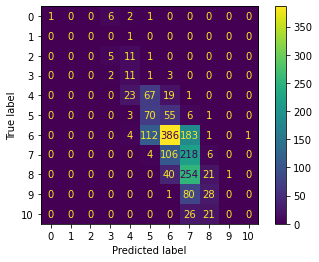

In [309]:
disp_1.plot()
plt.show()

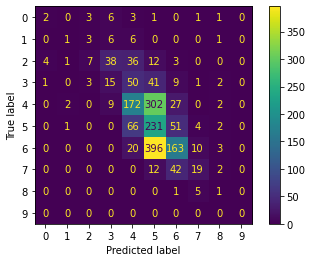

In [310]:
disp_2.plot()
plt.show()

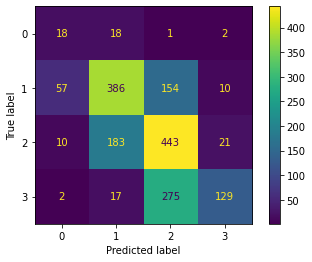

In [331]:
disp_3.plot()
plt.savefig('../Imagenes/confusion_matrix_3.png')
plt.show()

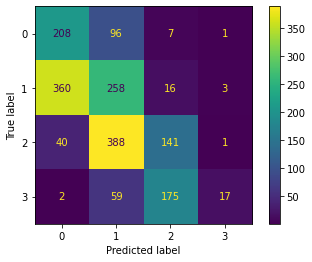

In [330]:
disp_4.plot()
plt.savefig('../Imagenes/confusion_matrix_4.png')
plt.show()

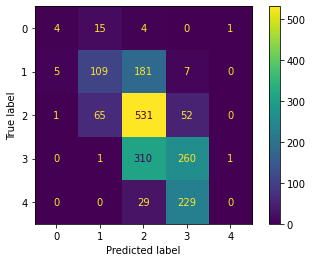

In [313]:
disp_5.plot()
plt.show()

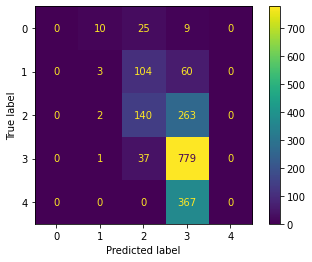

In [315]:
disp_6.plot()
plt.show()

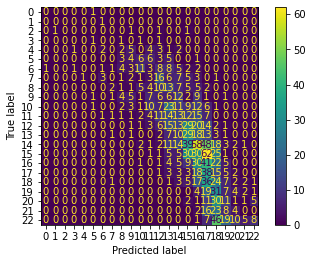

In [316]:
disp_7.plot()
plt.show()

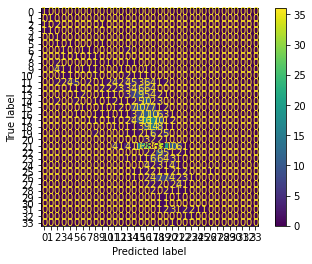

In [317]:
disp_8.plot()
plt.show()